In [235]:
import networkx as nx
import pandas as pd

# options de visualisation
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = [5,5]

# Graph

In [236]:
# création du graph
g = nx.Graph()

In [237]:
g.add_edges_from([(1, 2), (1, 3)])

In [238]:
g.number_of_edges()

2

In [239]:
g.number_of_nodes()

3

In [240]:
list(g.neighbors(1))

[2, 3]

In [241]:
g.edges

EdgeView([(1, 2), (1, 3)])

In [242]:
# on peut éditer les attributs des arêtes et des sommets
g.edges[(1,2)]['attribute'] = 20

In [243]:
g.edges[(1,2)], g.edges[(1,3)]

({'attribute': 20}, {})

# Directed Graph
ce sont des graphes orientés

In [244]:
dg = nx.DiGraph()

In [245]:
# on peut ajouter directement des arêtes avec un poids (une longueur)
dg.add_weighted_edges_from(
    [
        (1, 2, 0.5),
        (3, 1, 0.75),
        (3, 4, 1),
        (1,5,0.25),
        (5,3,0.1),
        (4,2,1),
        (2,5,3)
    ]
)

In [246]:
dg.edges[(1,2)]

{'weight': 0.5}

# Visualisation

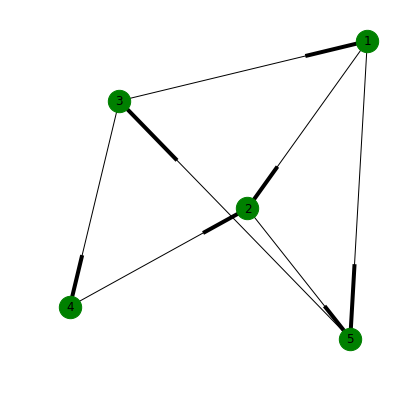

In [247]:

nx.draw(dg, with_labels=True, node_color='green', node_size=500)

# plus court chemin

## origine -> destination

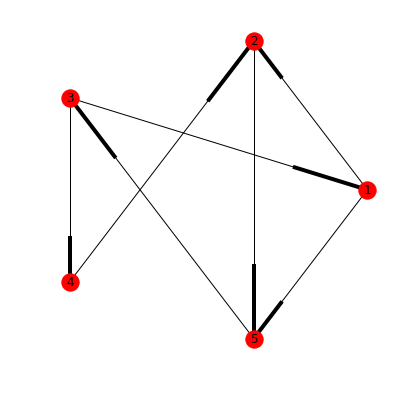

In [248]:
draw = nx.draw_circular(
    dg, 
    with_labels=True,
)
plt.show()

In [249]:
# calcul du plus court chemin entre le nœud 2 et le nœud 9
path = nx.dijkstra_path(dg, 1,3)
path

[1, 5, 3]

In [250]:
nx.dijkstra_path_length(dg, 1,3)

0.35

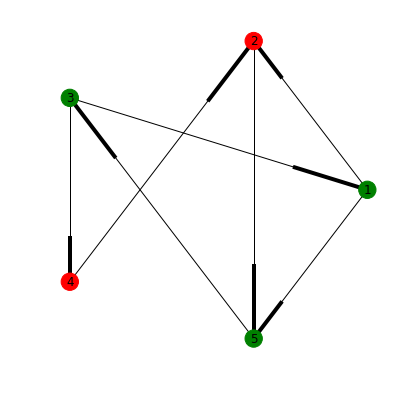

In [251]:
# visualisation du chemin sur le graphe
colors = ['green' if n in path else 'red' for n in dg.nodes]

draw = nx.draw_circular(
    dg, 
    with_labels=True, 
    node_color=colors
)

## Source unique

In [252]:
# tous les chemins issus d'une source
nx.single_source_dijkstra_path(dg, 1)

{1: [1], 2: [1, 2], 3: [1, 5, 3], 4: [1, 5, 3, 4], 5: [1, 5]}

In [253]:
# toutes les longueurs des chemins issus d'une source
nx.single_source_dijkstra_path_length(dg, 1)

{1: 0, 2: 0.5, 3: 0.35, 4: 1.35, 5: 0.25}

In [254]:
# les chemins et les longueurs pour une unique source
nx.single_source_dijkstra(dg, 1)

({1: 0, 2: 0.5, 3: 0.35, 4: 1.35, 5: 0.25},
 {1: [1], 2: [1, 2], 3: [1, 5, 3], 4: [1, 5, 3, 4], 5: [1, 5]})

##  Toutes paires | pairwise

In [255]:
# chemins
dict(nx.all_pairs_dijkstra_path(dg))

{1: {1: [1], 2: [1, 2], 3: [1, 5, 3], 4: [1, 5, 3, 4], 5: [1, 5]},
 2: {1: [2, 5, 3, 1], 2: [2], 3: [2, 5, 3], 4: [2, 5, 3, 4], 5: [2, 5]},
 3: {1: [3, 1], 2: [3, 1, 2], 3: [3], 4: [3, 4], 5: [3, 1, 5]},
 4: {1: [4, 2, 5, 3, 1], 2: [4, 2], 3: [4, 2, 5, 3], 4: [4], 5: [4, 2, 5]},
 5: {1: [5, 3, 1], 2: [5, 3, 1, 2], 3: [5, 3], 4: [5, 3, 4], 5: [5]}}

In [256]:
# longueurs
lengths = dict(nx.all_pairs_dijkstra_path_length(dg))
lengths

{1: {1: 0, 2: 0.5, 3: 0.35, 4: 1.35, 5: 0.25},
 2: {1: 3.85, 2: 0, 3: 3.1, 4: 4.1, 5: 3},
 3: {1: 0.75, 2: 1.25, 3: 0, 4: 1, 5: 1.0},
 4: {1: 4.85, 2: 1, 3: 4.1, 4: 0, 5: 4},
 5: {1: 0.85, 2: 1.35, 3: 0.1, 4: 1.1, 5: 0}}

In [259]:
# table des distances
df = pd.DataFrame(lengths).T
df.index.name = 'origin'
df.columns.name = 'destination'
df

destination,1,2,3,4,5
origin,,,,,
1,0.00,0.50,0.35,1.35,0.25
2,3.85,0.00,3.10,4.10,3.00
3,0.75,1.25,0.00,1.00,1.00
4,4.85,1.00,4.10,0.00,4.00
5,0.85,1.35,0.10,1.10,0.00
